<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install swig
!pip install "gymnasium[box2d]"
!pip install "ray[rllib]"
!pip install renderlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2398778 sha256=407da7574c49645c7e61df4d83dbbf6e2b7a1a1c7d7ec16aee962932d2d70447
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


reset(): επαναφέρει το περιβάλλον στην αρχική του κατάσταση. Καλείται πάντα στην αρχή για να ξεκινήσει το παιχνίδι/πείραμα από το μηδέν και επιστρέφει την αρχική παρατήρηση στον πράκτορα.

step(action): εκτελεί ένα χρονικό βήμα στο περιβάλλον. Δέχεται ως είσοδο την ενέργεια (action) του πράκτορα και επιστρέφει τη νέα κατάσταση (observation), την επιβράβευση (reward), καθώς και το αν τερματίστηκε (terminated/truncated).

render(): Η συνάρτηση αυτή χρησιμεύει για την οπτικοποίηση του περιβάλλοντος. Παράγει γραφικά ώστε να μπορεί ο χρήστης να παρακολουθεί την εξέλιξη και τη συμπεριφορά του πράκτορα.

Observation Space (State)
Είναι ένα Διάνυσμα 8 στοιχείων. Πρόκειται για float που περιγράφουν την κατάσταση του σκάφους κάθε στιγμή. Συγκεκριμένα, το διάνυσμα περιέχει:

Συντεταγμένη X
Συντεταγμένη Y
Ταχύτητα στον άξονα X
Ταχύτητα στον άξονα Y
Γωνία του σκάφους (Angle)
Γωνιακή ταχύτητα (Angular velocity)
Επαφή αριστερού ποδιού με το έδαφος (Boolean: 0 αν δεν ακουμπάει, 1 αν ακουμπάει)
Επαφή δεξιού ποδιού με το έδαφος (Boolean: 0 αν δεν ακουμπάει, 1 αν ακουμπάει)

Action Space
Είναι 4 Διακριτές Ενέργειες (Discrete(4)). Ο πράκτορας μπορεί να επιλέξει μία από τις παρακάτω ενέργειες σε κάθε χρονικό βήμα:

0: Do nothing
1: Fire main engine
2: Fire left orientation engine
3: Fire right orientation engine

In [2]:
import ray
from ray.rllib.algorithms.ppo import PPOConfig

# Τερματισμός τυχόν προηγούμενης διεργασίας
ray.shutdown()
ray.init()

# Ρυθμίσεις PPO
config = PPOConfig()
config.use_critic = True
config.use_gae = True
config.lambda_ = 0.95
config.use_kl_loss = True
config.sgd_minibatch_size = 32
config.num_sgd_iter = 30
config.shuffle_sequences = True
config.vf_loss_coeff = 0.5
config.entropy_coeff = 0.001
config.clip_param = 0.2

agent = config.environment("LunarLander-v3")\
    .framework("torch")\
    .api_stack(
        enable_rl_module_and_learner=False,
        enable_env_runner_and_connector_v2=False
    )\
    .build()

print(agent.get_policy().model)

2026-01-12 18:04:45,307	INFO worker.py:2007 -- Started a local Ray instance.
/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py:2046: FutureWarning: Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0
  warnings.warn(
2026-01-12 18:04:54,580	WARNING ipython-input-2965874957.py:27 -- DeprecationWarning: `build` has been deprecated. Use `AlgorithmConfig.build_algo` instead. This will raise an error in the future!
(pid=5955) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=5955) E0000 00:00:1768241097.077161    5955 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=5954) E0000 00:00:1768241097.113524    5954 cuda_blas.cc:1407] Unable to register cuBLAS factory: At

FullyConnectedNetwork(
  (_logits): SlimFC(
    (_model): Sequential(
      (0): Linear(in_features=256, out_features=4, bias=True)
    )
  )
  (_hidden_layers): Sequential(
    (0): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=8, out_features=256, bias=True)
        (1): Tanh()
      )
    )
    (1): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): Tanh()
      )
    )
  )
  (_value_branch_separate): Sequential(
    (0): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=8, out_features=256, bias=True)
        (1): Tanh()
      )
    )
    (1): SlimFC(
      (_model): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): Tanh()
      )
    )
  )
  (_value_branch): SlimFC(
    (_model): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)


Το μοντέλο είναι ένα πλήρως συνδεδεμένο δίκτυο (MLP) αρχιτεκτονικής Actor-Critic με διαμοιραζόμενα βάρη. Δέχεται ως είσοδο τις 8 τιμές της κατάστασης (State) και επεξεργάζεται την πληροφορία μέσω δύο κρυφών επιπέδων των 256 νευρώνων (με συνάρτηση ενεργοποίησης tanh). Στην έξοδο, το δίκτυο διαχωρίζεται σε δύο κλάδους: τον Actor (4 νευρώνες για τις πιθανότητες των ενεργειών) και τον Critic (1 νευρώνας για την εκτίμηση της αξίας/Value function).

Starting training...


2026-01-12 18:05:30,885	WARNING train_ops.py:114 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


Iteration 001 | Average Reward: -190.00
Iteration 002 | Average Reward: -165.38
Iteration 003 | Average Reward: -142.37
Iteration 004 | Average Reward: -118.30
Iteration 005 | Average Reward: -109.43
Iteration 006 | Average Reward: -89.73
Iteration 007 | Average Reward: -75.31
Iteration 008 | Average Reward: -66.93
Iteration 009 | Average Reward: -57.68
Iteration 010 | Average Reward: -44.99
Iteration 011 | Average Reward: -41.51
Iteration 012 | Average Reward: -35.36
Iteration 013 | Average Reward: -32.37
Iteration 014 | Average Reward: -29.25
Iteration 015 | Average Reward: -29.32
Iteration 016 | Average Reward: -24.21
Iteration 017 | Average Reward: -23.19
Iteration 018 | Average Reward: -20.09
Iteration 019 | Average Reward: -18.25
Iteration 020 | Average Reward: -16.42
Iteration 021 | Average Reward: -17.42
Iteration 022 | Average Reward: -14.08
Iteration 023 | Average Reward: -13.95
Iteration 024 | Average Reward: -12.27
Iteration 025 | Average Reward: -12.43
Iteration 026 | Aver

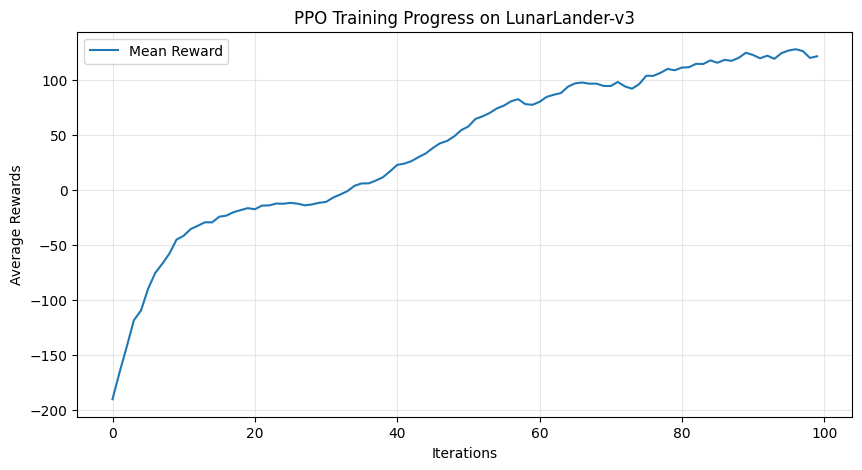

In [3]:
import matplotlib.pyplot as plt

# Ορίζουμε τον αριθμό των επαναλήψεων
train_iterations = 100
average_rewards_per_iteration = []

print("Starting training...")

for i in range(train_iterations):
    # Εκτέλεση ενός κύκλου εκπαίδευσης
    result = agent.train()
    avg_reward = result['env_runners']['episode_reward_mean']
    average_rewards_per_iteration.append(avg_reward)

    print(f'Iteration {i + 1:03d} | Average Reward: {avg_reward:.2f}')

# Δημιουργία γραφικής παράστασης
plt.figure(figsize=(10, 5))
plt.plot(average_rewards_per_iteration, label='Mean Reward')
plt.title('PPO Training Progress on LunarLander-v3')
plt.xlabel('Iterations')
plt.ylabel('Average Rewards')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Καταλαβαίνουμε ότι ο πράκτορας μαθαίνει παρατηρώντας την αύξηση του Average Reward. Στην αρχή, ο πράκτορας κάνει τυχαίες κινήσεις και συνήθως συντρίβεται, οπότε το reward είναι πολύ χαμηλό.

In [4]:
import gymnasium as gym
import renderlab as rl

# Δημιουργία του περιβάλλοντος LunarLander με render_mode='rgb_array'
# Χρησιμοποιούμε την έκδοση v3 που είναι συμβατή με το setup μας
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    # Αντί για env.action_space.sample() (τυχαία κίνηση),
    # ζητάμε από τον εκπαιδευμένο πράκτορα να επιλέξει ενέργεια.
    action = agent.compute_single_action(observation)

    # Εκτέλεση της ενέργειας στο περιβάλλον
    observation, reward, terminated, truncated, info = env.step(action)

    # Έλεγχος αν τελείωσε το επεισόδιο
    if terminated or truncated:
        break

# Προβολή του βίντεο
env.play()

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':

2026-01-12 18:30:18,543	WARNING ipython-input-3643895760.py:14 -- DeprecationWarning: `compute_single_action` has been deprecated. `Algorithm.compute_single_action` should no longer be used. Get t

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  95%|█████████▍| 276/291 [00:01<00:00, 206.48it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1768242618.3578985.mp4, 720000 bytes wanted but 0 bytes read,at frame 290/291, at time 9.67/9.67 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4
